# Practical motivation
According to the World Health Organization, Heart diseases, also known as cardiovascular diseases (CVDs) are the number 1 cause of death around the world. An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Hence, we would like to find out more information on how heart diseases arises, and to see how we can reduce it.



Given a set of data, we would like to model how likely it is to get heart disease.


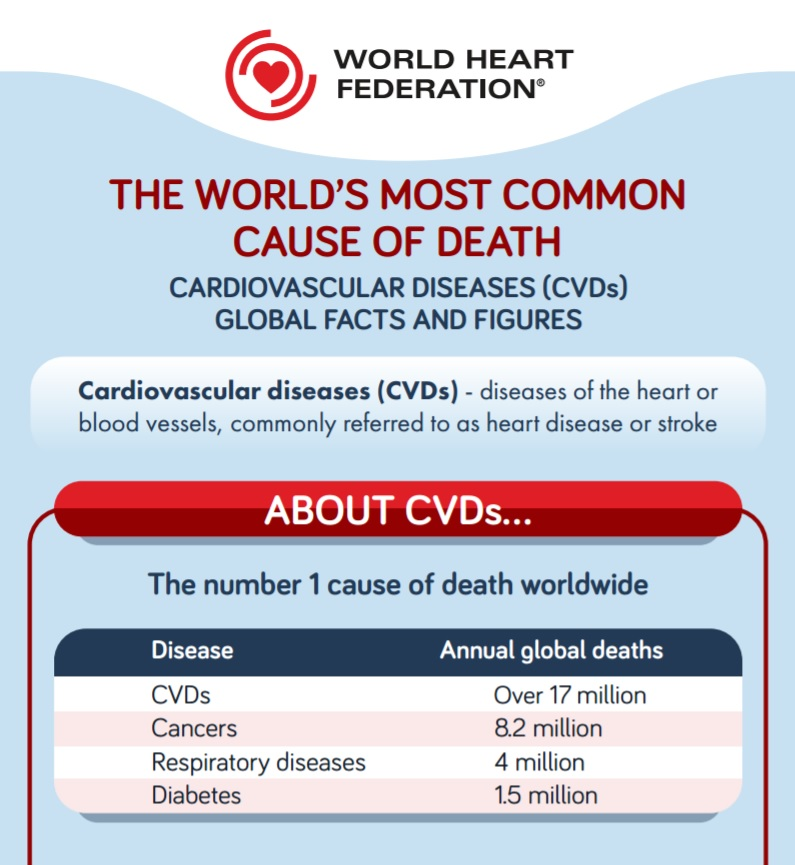

# Problem definition:
To predict the likelihood of someone getting cardiovascular disease


#Importing python libraries/data

In [20]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [21]:
# from google.colab import files
# uploaded = files.upload()

In [22]:
# import io

# data = pd.read_csv(io.BytesIO(uploaded['cardio.csv']), sep=';')
# data.head()

In [23]:
data = pd.read_csv("cardio.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Cleaning of data




The dataset contains information about patients doing cardiovascular disease examination.

From the data, we see that there are no null values

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
age| Age of the patient |(in days)   
gender| Gender of the patient| (1 - women, 2 - men)     
height| Height of the patient| (in cm)        
ap_hi| Systolic blood pressure      
ap_lo| Diastolic blood pressure     
cholesterol| cholestrol category| (1: normal, 2: above normal, 3: well above normal)       
gluc| glucose category| (1: normal, 2: above normal, 3: well above normal)      
smoke| Whether patient smoke| (0: Non-smoker, 1: Smoker)   
alco| Whether patient drinks alcohol| (0: Non-drinker, 1: Drinker)    
active| Whether patient is active in exercising| (0: Non-active, 1: Active) 
cardio| Presence/Absence of cardiovascular disase| (0: Absence, 1: Presence)

In [25]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Observations: 
We see a couple of issues in the dataset

* Hard to work with age in days, look to convert to years
* min and max height values may be unrealistic
* min and max weight values may be unrealistic
* ap_hi and ap_lo have negative values (not possible) and unrealisticly high max values

---
### Identifying outliers from height column 

In [26]:
heights = data["height"]
heights.describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

<AxesSubplot:>

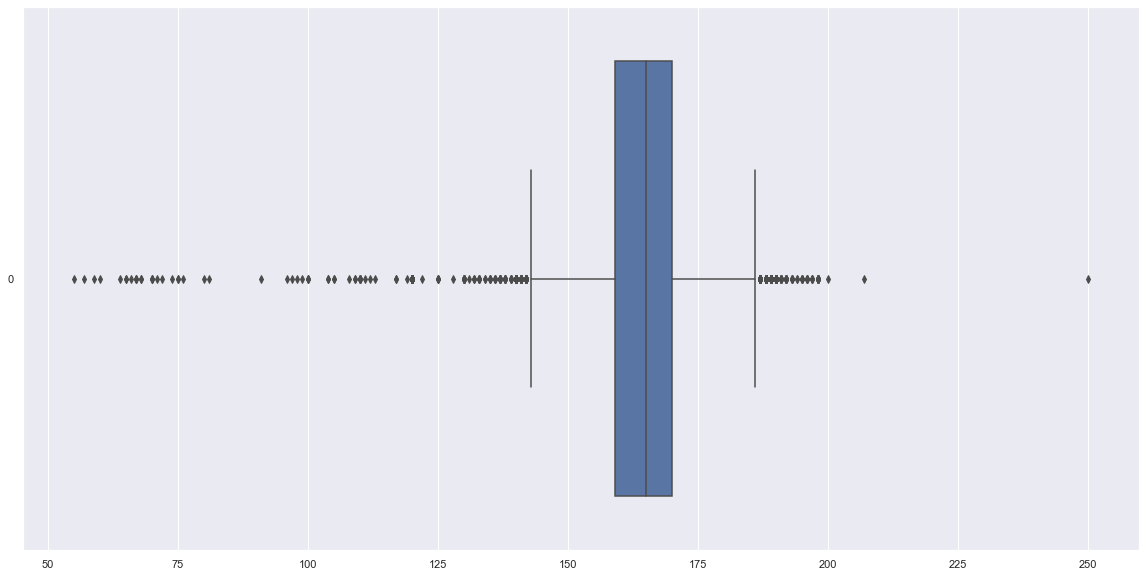

In [27]:
f = plt.figure(figsize=(20,10))

sb.boxplot(data=heights, orient='h')

In [28]:
Q1 = heights.quantile(0.25)
Q3 = heights.quantile(0.75)
IQR = Q3 - Q1   

outliers = heights[(heights < Q1 - 1.5 * IQR) | (heights > Q3 + 1.5 * IQR)].index

In [29]:
outliers

Int64Index([   62,    76,   224,   249,   781,  1027,  1048,  1117,  1419,
             2160,
            ...
            68956, 69052, 69124, 69216, 69291, 69430, 69475, 69589, 69784,
            69873],
           dtype='int64', length=519)

In [30]:
# drop the height outliers from the main dataset
# we should expect a decrease of 519 values

data.drop(outliers, inplace=True)

In [31]:
# check that the new data shape has 70000-519 = 69481
data.shape

(69481, 13)

<AxesSubplot:>

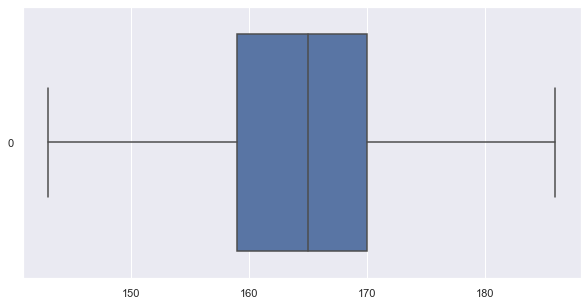

In [32]:
# to further check, plot the boxplot of the new height variable
heights = data["height"]

f = plt.figure(figsize=(10,5))
sb.boxplot(data=heights, orient='h')

### Observations: 
Through the data shape and the new box plot, we have successfully removed all height outliers

---

### Identifying outliers from the other columns

Since our method of removing outliers will be the same, we create a function to remove outliers from the other columns

In [33]:
def remove(var):
    curr = data[var]
    Q1 = curr.quantile(0.25)
    Q3 = curr.quantile(0.75)
    IQR = Q3 - Q1   

    outliers = curr[(curr < Q1 - 1.5 * IQR) | (curr > Q3 + 1.5 * IQR)].index
    data.drop(outliers, inplace=True)

In [34]:
lst = ["age", "weight", "ap_hi", "ap_lo"]
for i in lst:
    remove(i)
    
data.shape

(62502, 13)

In [35]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,49941.878468,19493.750360,1.348581,164.406131,73.181456,126.420339,81.699146,1.357717,1.220649,0.086349,0.052174,0.804310,0.493904
std,28864.471866,2458.088341,0.476525,7.531374,12.271998,14.289980,7.673399,0.675203,0.567601,0.280881,0.222380,0.396734,0.499967
min,0.000000,14282.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24876.500000,17724.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49980.500000,19718.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74848.750000,21341.750000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


---

### To convert age columns from days to years

In [36]:
data['age'] = data['age'].apply(lambda x: x//365)

In [37]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,49941.878468,52.908867,1.348581,164.406131,73.181456,126.420339,81.699146,1.357717,1.220649,0.086349,0.052174,0.804310,0.493904
std,28864.471866,6.741475,0.476525,7.531374,12.271998,14.289980,7.673399,0.675203,0.567601,0.280881,0.222380,0.396734,0.499967
min,0.000000,39.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24876.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49980.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74848.750000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


---
### Visualising the new dataset

In [38]:
#Visualing the numeric variables

numerics = ["age", "height", "weight", "ap_hi", "ap_lo"]

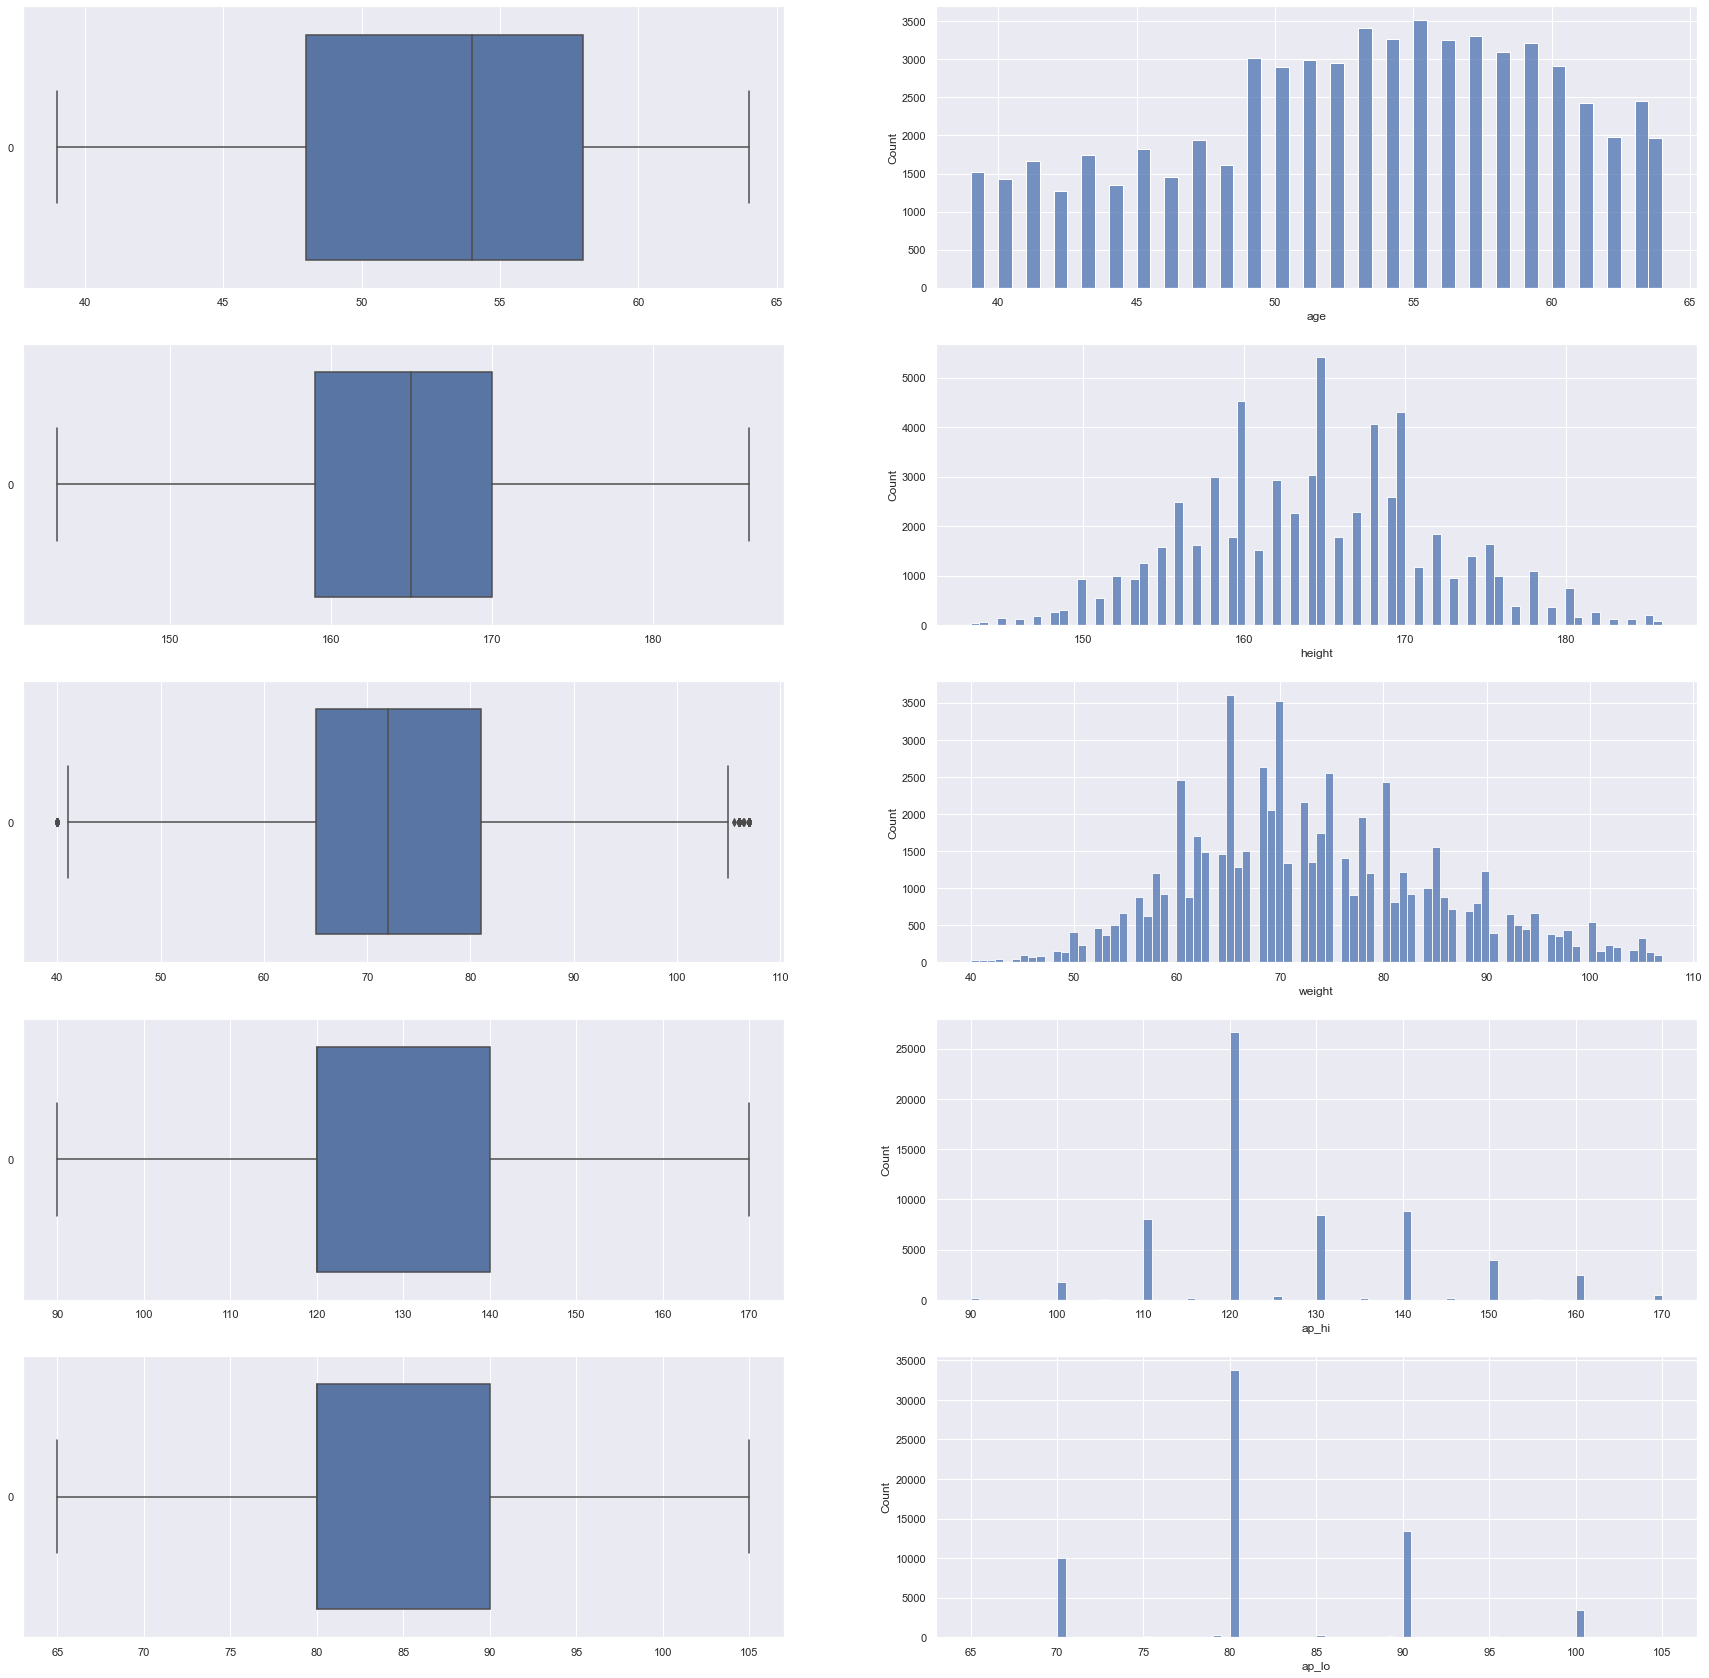

In [39]:
f,axes = plt.subplots(5, 2, figsize=(30, 30))

for i,val in enumerate(numerics):
    sb.boxplot(data = data[val], orient = "h", ax = axes[i][0])
    sb.histplot(data = data[val], ax = axes[i][1])

In [40]:
#Visualising the categorical variables with target variable

categories = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

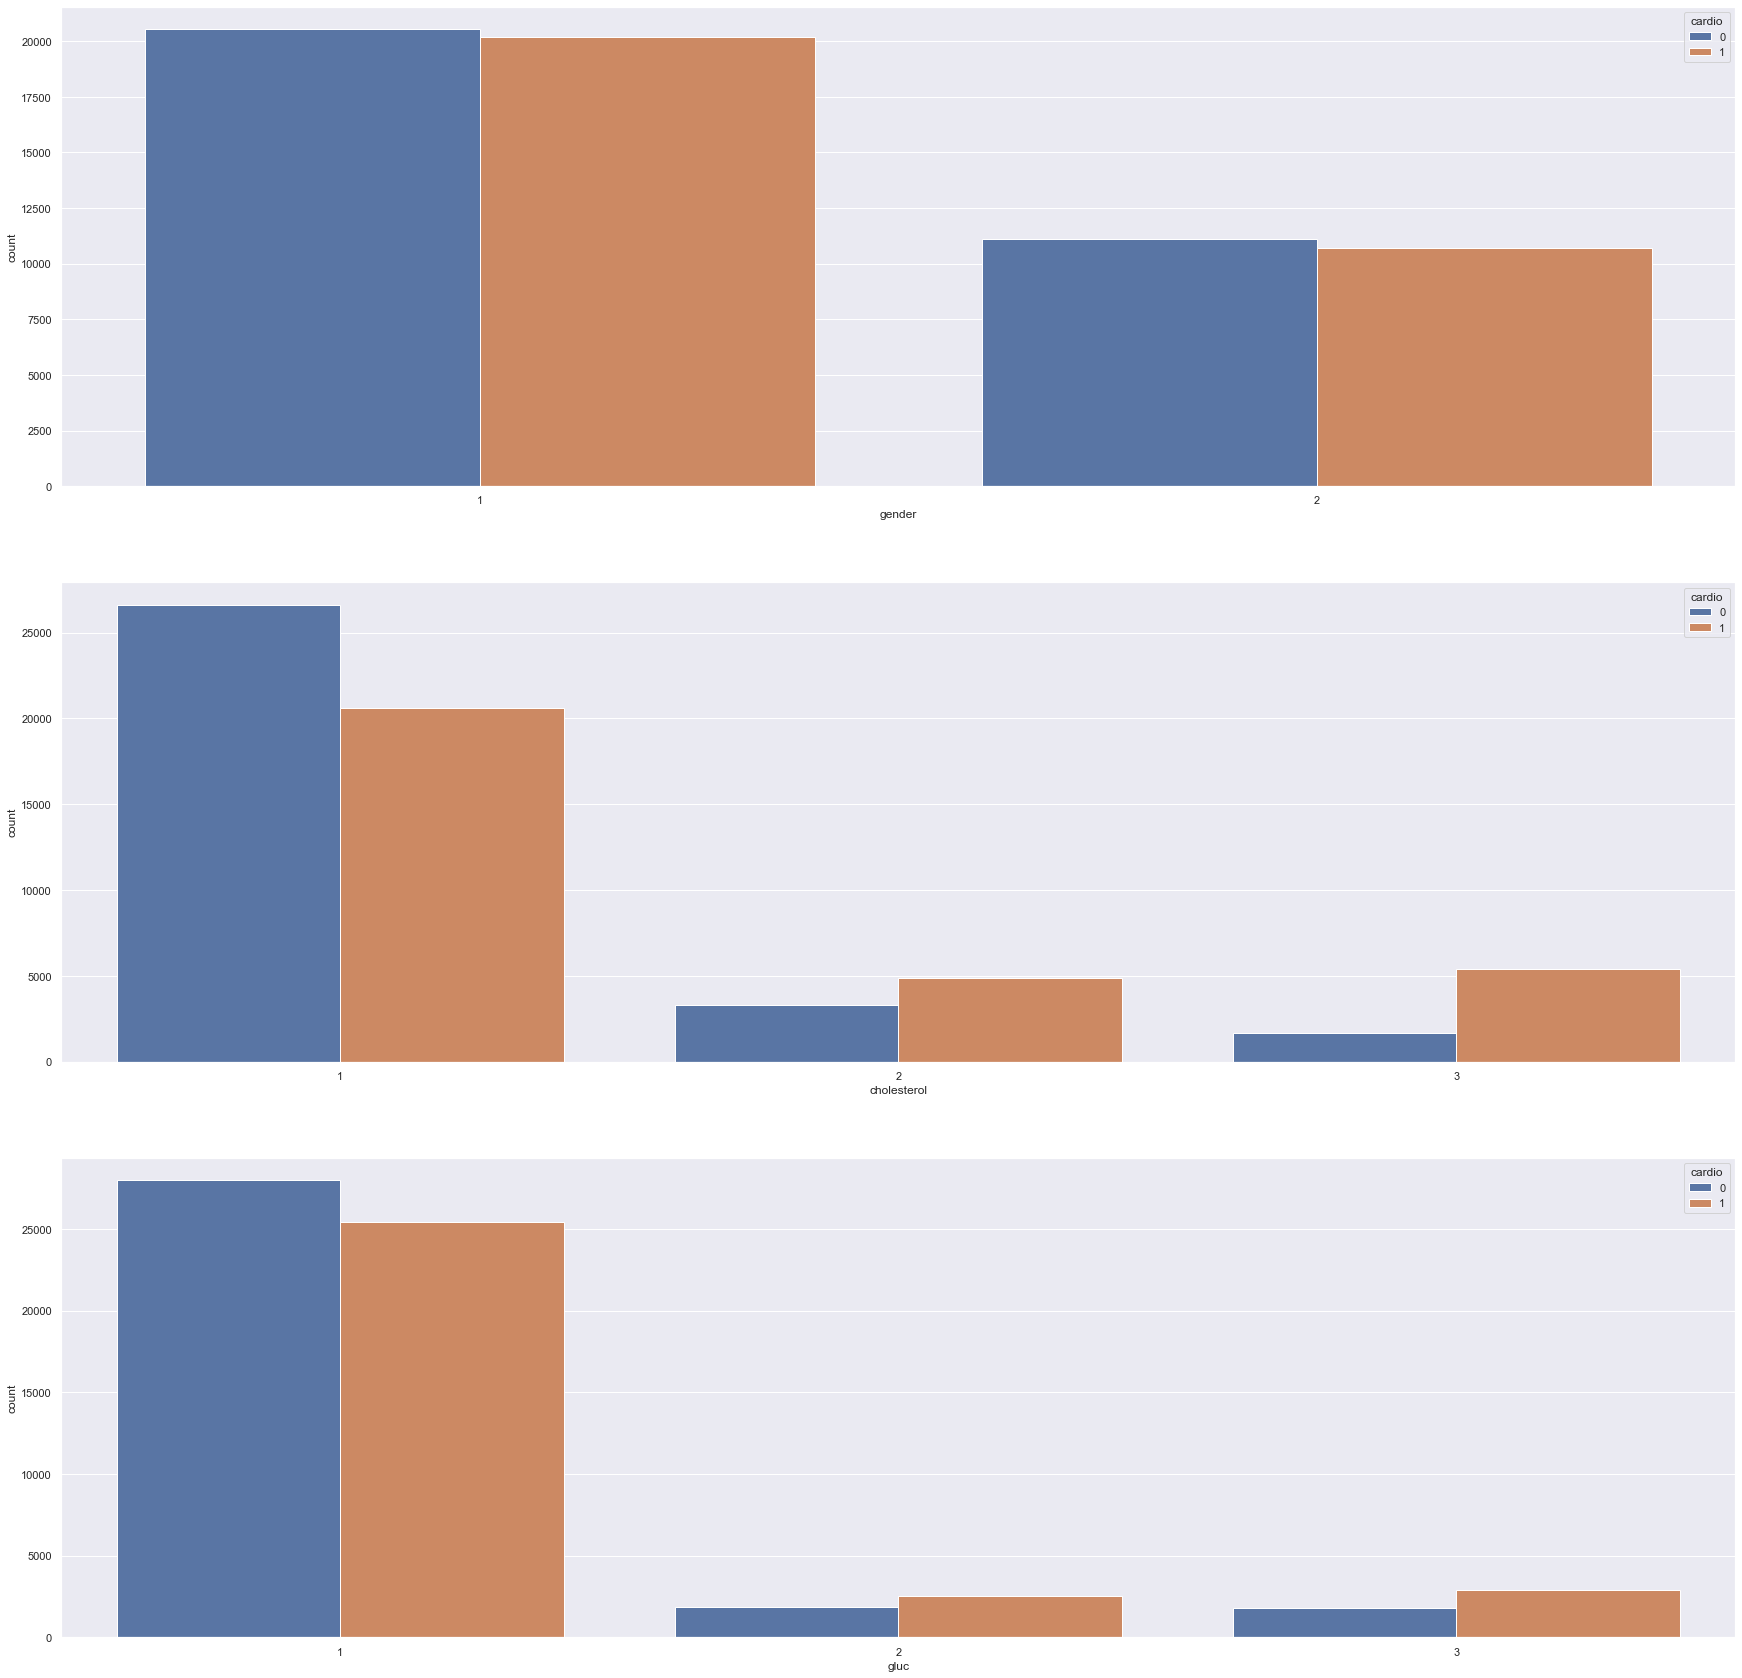

In [41]:
f ,axes = plt.subplots(3, 1, figsize=(30, 30))

for i,val in enumerate(categories[:3]):
    sb.countplot(x=val, hue="cardio", data=data, ax=axes[i]);

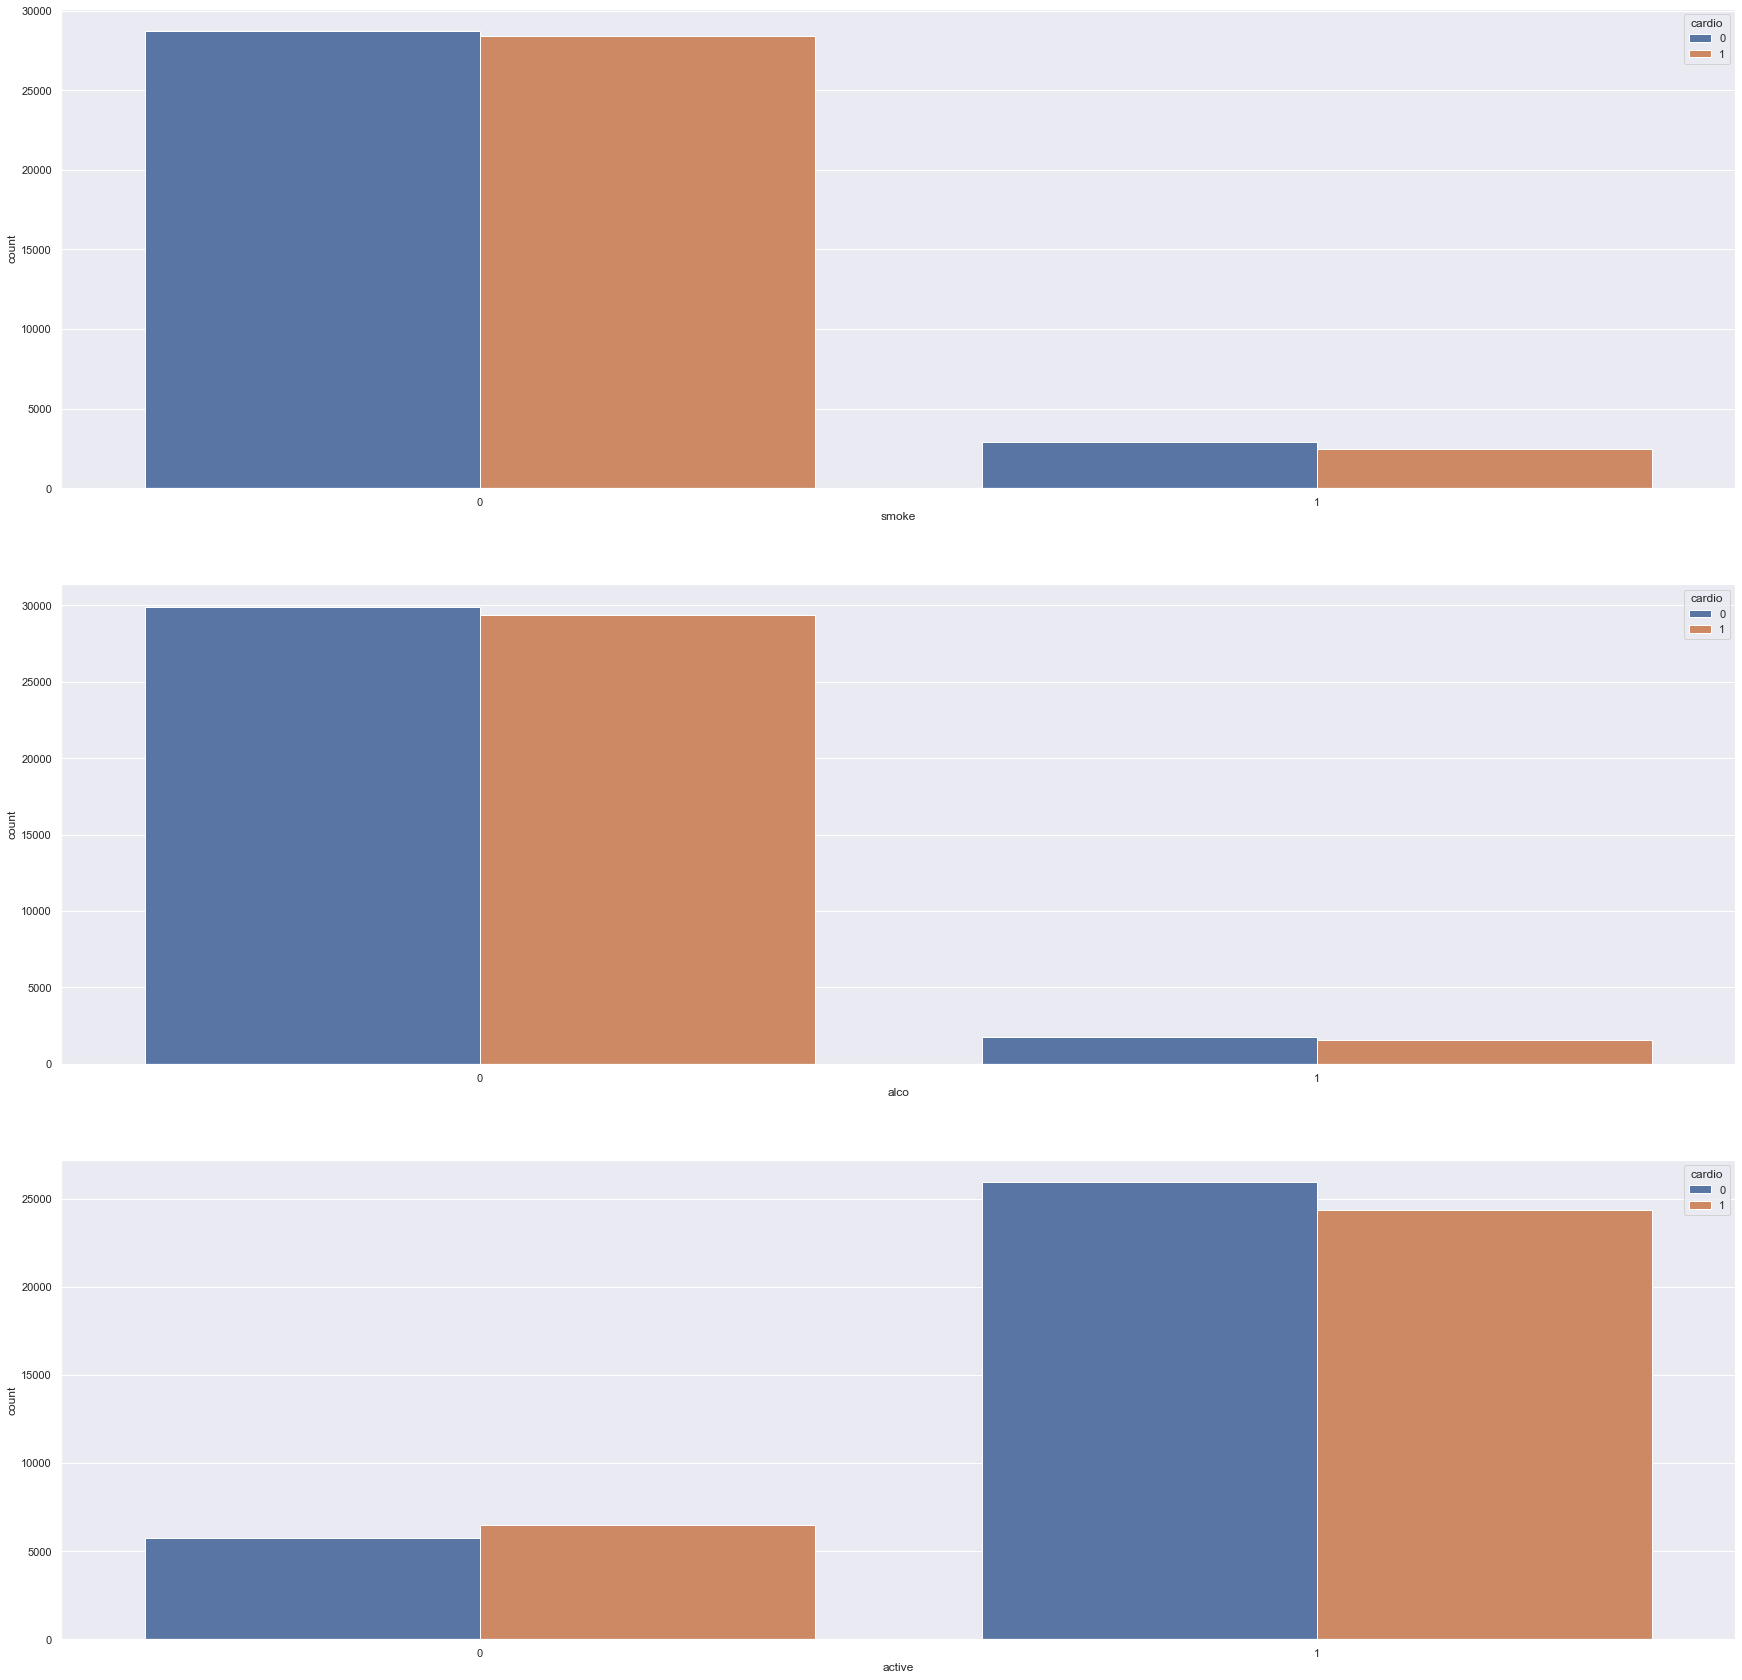

In [42]:
f ,axes = plt.subplots(3, 1, figsize=(30, 30))

for i,val in enumerate(categories[3:]):
    sb.countplot(x=val, hue="cardio", data=data, ax=axes[i]);

---
### Perform multi variate analysis

/var/folders/tv/nldp6r3x3fs399r9htps4vrw0000gn/T/ipykernel_18406/3998874508.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(temp.corr(), dtype=np.bool)


<AxesSubplot:>

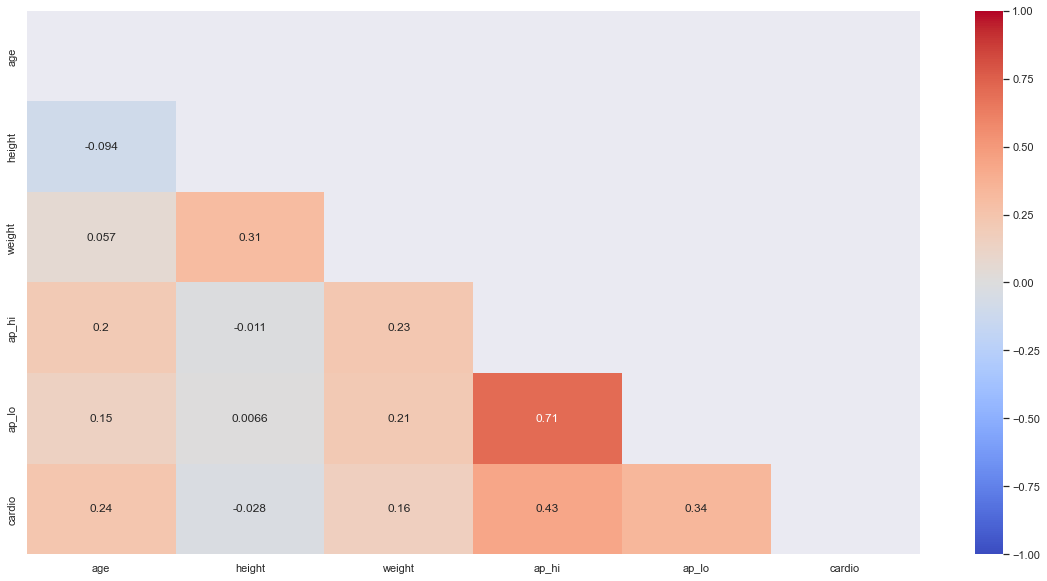

In [43]:
temp = data[numerics + ["cardio"]]
              
mask = np.zeros_like(temp.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True    
    
f = plt.figure(figsize=(20,10))
sb.heatmap(temp.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

### Observations:
Variables **ap_hi** and **ap_lo** have a strong correlation with one another, which is expected. 
In terms of our target variable cardio, only **age**, **ap_lo** and **ap_hi** have a moderate correlation.
However, **height** and **weight** themselves have a weak correlation with cardio.   

---
### Combining height and weight into a single BMI column
In reality, BMI is another good indicator to determine how healthy an individual is. A normal healthy BMI should have a range of 18.5 to 25.

Formula for BMI = mass in kg / (height in m) ** 2 

In [44]:
data["BMI"] = data.apply(lambda x: x["weight"] / ((x["height"]/100)*(x["height"]/100) ), axis=1)

In [45]:
data["BMI"].describe()

count    62502.000000
mean        27.120241
std          4.567616
min         13.520822
25%         23.875115
50%         26.233556
75%         29.760838
max         50.891795
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

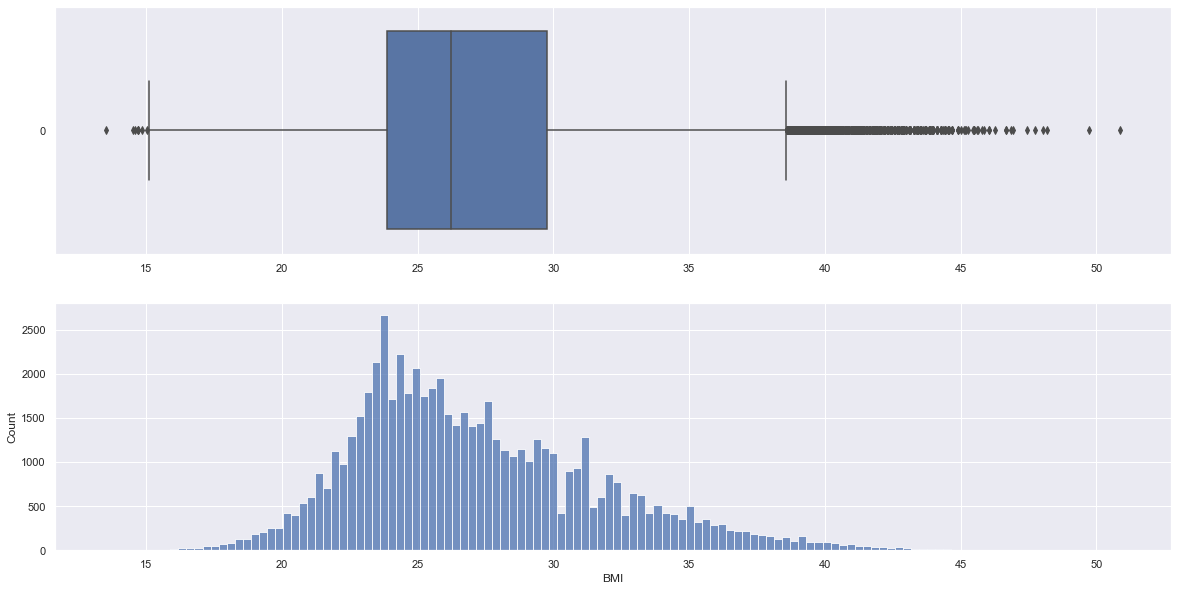

In [46]:
# Visualise BMI with box plot and hist plot

f,axes = plt.subplots(2, 1, figsize=(20,10))

sb.boxplot(data = data["BMI"], orient = "h", ax = axes[0])
sb.histplot(data = data["BMI"], ax = axes[1])

<AxesSubplot:>

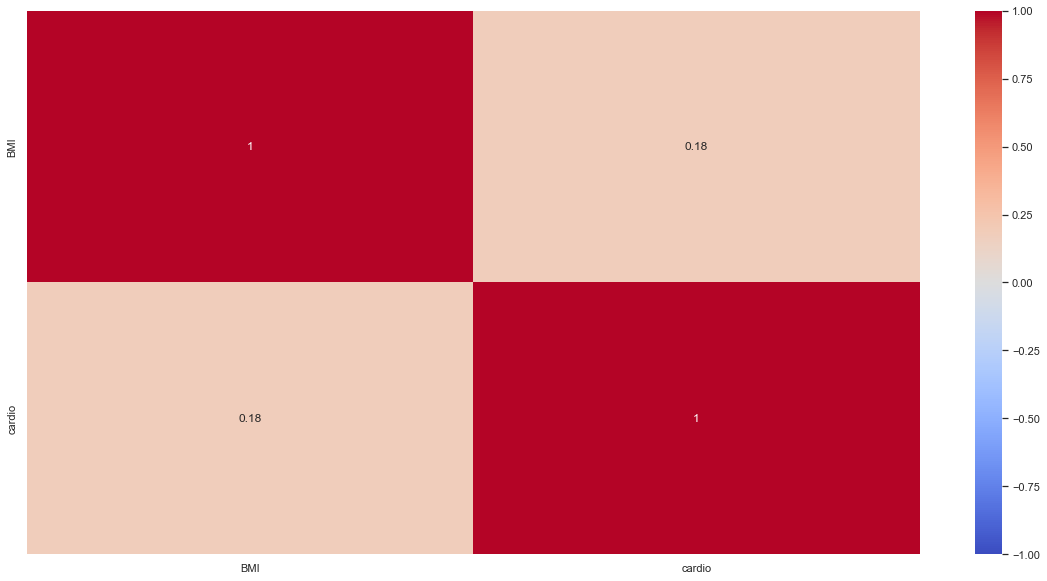

In [47]:
# Observe correlation of BMI with cardio

temp = data[["BMI","cardio"]]   
    
f = plt.figure(figsize=(20,10))
sb.heatmap(temp.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

### Observation:
The value of 0.17 is only slightly higher than that of weight = 0.16. Combining the variables does not significantly improve the correlation value.

## Model 1: Binary Classification

Before we build the tree, we need to encode the gender variable as it is a nominal variable (no ordering).

In [48]:
#Encoding the Gender variable

genders = pd.get_dummies(data.gender)
genders.rename(columns={1: "female", 2: "male"}, inplace=True)
genders

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
5,1,0
...,...,...
69993,1,0
69994,1,0
69995,0,1
69998,1,0


In [49]:
#Concat to our original dataframe

data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)
data

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,female,male
0,0,50,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,1
1,1,55,156,85.0,140,90,3,1,0,0,1,1,34.927679,1,0
2,2,51,165,64.0,130,70,3,1,0,0,0,1,23.507805,1,0
3,3,48,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,1
5,8,60,151,67.0,120,80,2,2,0,0,0,0,29.384676,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,172,70.0,130,90,1,1,0,0,1,1,23.661439,1,0
69994,99992,57,165,80.0,150,80,1,1,0,0,1,1,29.384757,1,0
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,26.927438,0,1
69998,99998,61,163,72.0,135,80,1,2,0,0,0,1,27.099251,1,0


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [51]:
y = pd.DataFrame(data["cardio"])
X = pd.DataFrame(data.drop("cardio", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

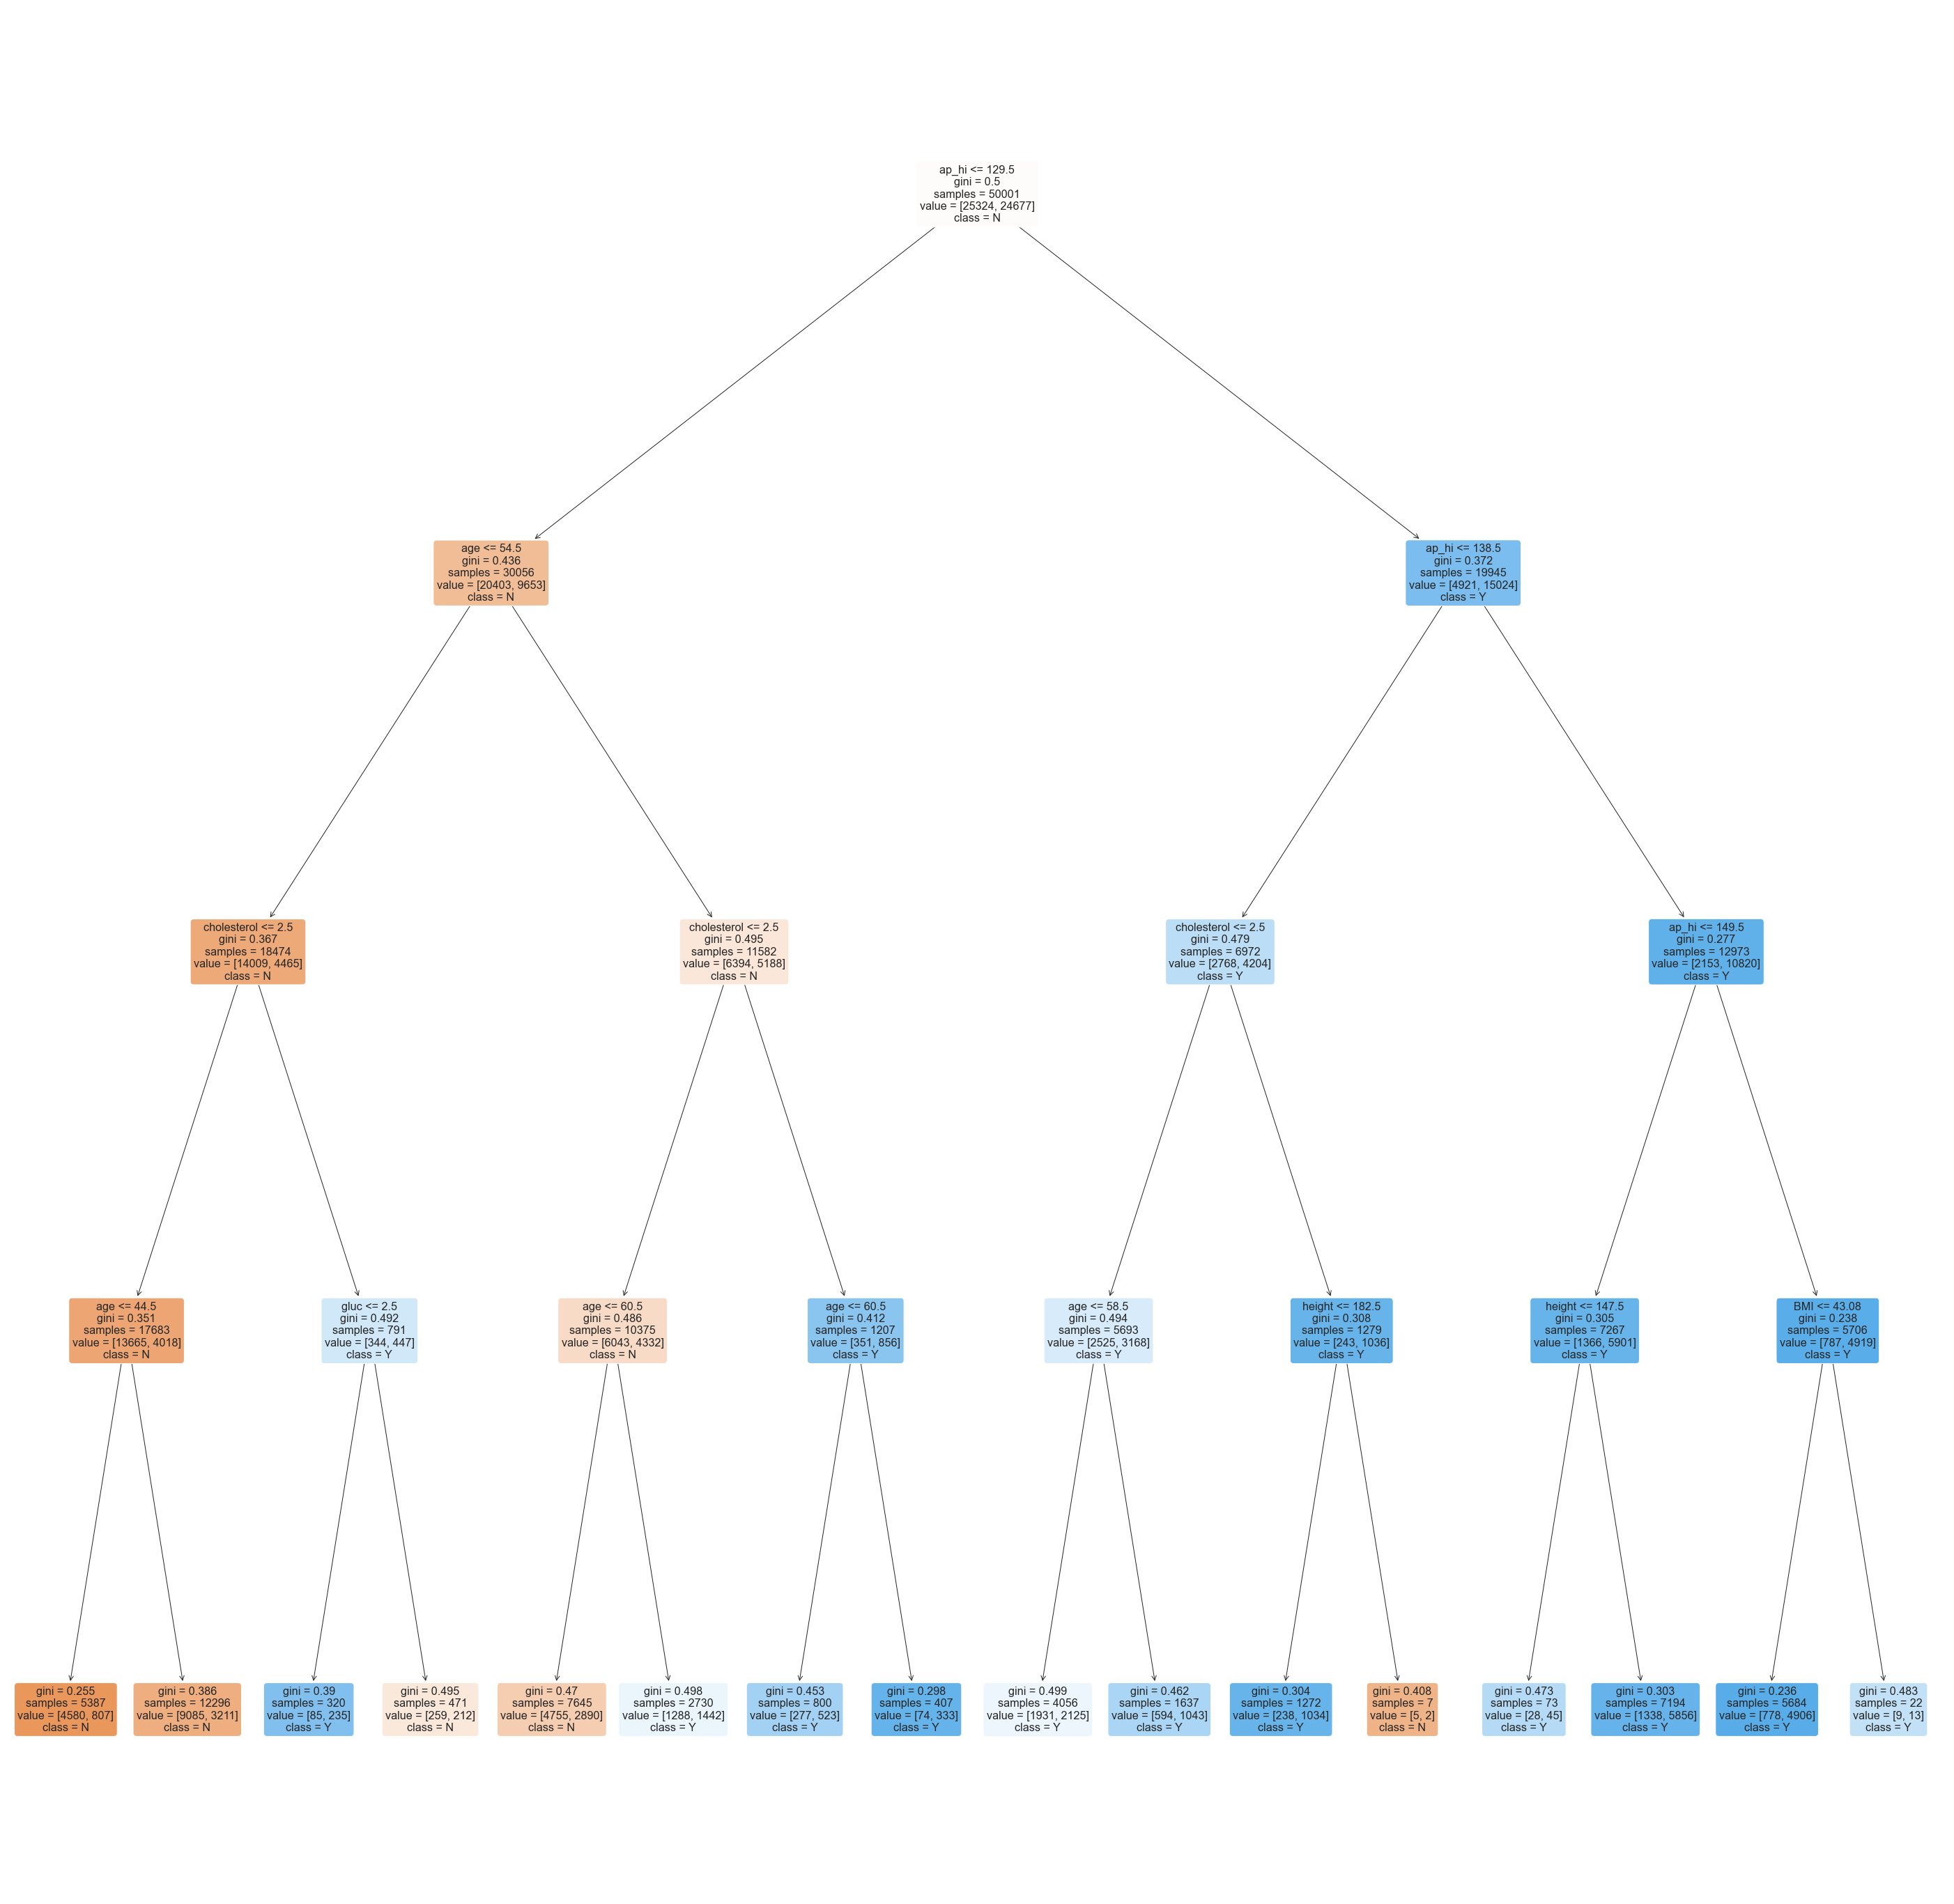

In [52]:
tree = DecisionTreeClassifier(max_depth = 4)  
tree.fit(X_train, y_train)                    

f = plt.figure(figsize=(50,50))
if 1:
    plot_tree(tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["N","Y"])

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.72477

TPR Train	: 0.71139
TNR Train	: 0.73780

FPR Train	: 0.26220
FNR Train	: 0.28861


<AxesSubplot:>

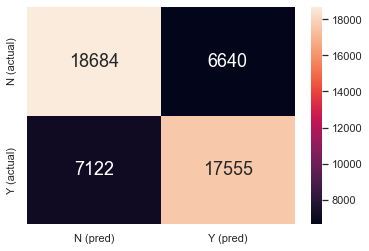

In [53]:
y_train_pred = tree.predict(X_train)

xlabels = ["N (pred)","Y (pred)"]
ylabels = ["N (actual)","Y (actual)"]

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {tree.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.72394

TPR Test	: 0.71387
TNR Test	: 0.73383

FPR Test	: 0.26617
FNR Test	: 0.28613


<AxesSubplot:>

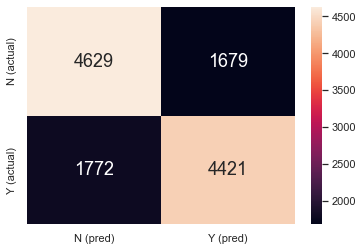

In [54]:
y_test_pred = tree.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {tree.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

### Observations:
The binary classifier performed similarly on both train and test data. With an overall accuracy of 72%, we experiment with other models to improve on the classification accuracy.

---

## Model 2: Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)      # set the maximum depth of each tree

forest.fit(X_train, y_train)

/var/folders/tv/nldp6r3x3fs399r9htps4vrw0000gn/T/ipykernel_18406/433312623.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=4)

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.72355

TPR Train	: 0.64570
TNR Train	: 0.79940

FPR Train	: 0.20060
FNR Train	: 0.35430


<AxesSubplot:>

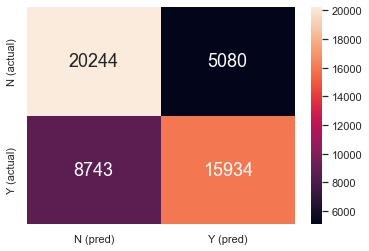

In [56]:
y_train_pred = forest.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {forest.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.71858

TPR Test	: 0.64476
TNR Test	: 0.79106

FPR Test	: 0.20894
FNR Test	: 0.35524


<AxesSubplot:>

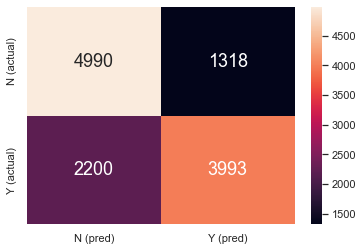

In [57]:
y_test_pred = forest.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {forest.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,500,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 6)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
grid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
grid.fit(X_train, y_train.cardio.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy')

In [59]:
# Fetch the best Model or the best set of Hyper-parameters
print(grid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(grid.best_score_))

RandomForestClassifier(max_depth=5, n_estimators=300)
0.7238654574542546


## Model 3: Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000)

logr.fit(X_train, y_train.cardio.ravel())

LogisticRegression(max_iter=1000)

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.70027

TPR Train	: 0.65466
TNR Train	: 0.74471

FPR Train	: 0.25529
FNR Train	: 0.34534


<AxesSubplot:>

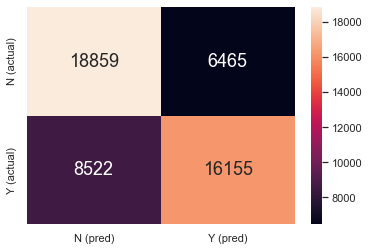

In [61]:
y_train_pred = logr.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {logr.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

In [62]:
param_grid =  {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': range(500,1001,100)
}


clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train.cardio.ravel())

/Users/linchlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/linchlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/linchlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/linchlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': range(500, 1001, 100),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [64]:
# Fetch the best Model or the best set of Hyper-parameters
print(clf.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(clf.best_score_))

LogisticRegression(C=100.0, max_iter=500, solver='newton-cg')
0.7239253834616538


##Since xxx has the highest accuracy/R value etc, we should use xxxx

We have come up with an equation